In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import random
import os

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# ID 제외 데이터 갖고오기 

train = pd.read_csv('../../DATA/train.csv').drop(columns=['ID'])
test  = pd.read_csv('../../DATA/test.csv').drop(columns=['ID'])
trade = pd.read_csv('../../DATA/international_trade.csv')

In [24]:
trade['수출가격'] = trade['수출 금액']/trade['수출 중량']*100000
trade['수입가격'] = trade['수입 금액']/trade['수입 중량']*100000

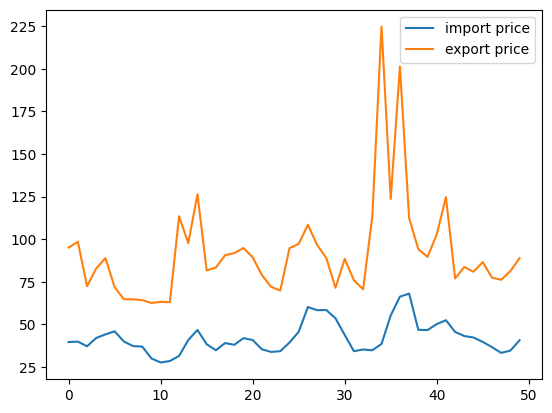

In [23]:
item_trade = trade[trade['품목명'].str.contains('당근')]
item_trade['수출가격'] = item_trade['수출 금액']/item_trade['수출 중량']*100000
item_trade['수입가격'] = item_trade['수입 금액']/item_trade['수입 중량']*100000
item_trade

plt.plot(np.arange(len(item_trade.index)), item_trade['수입가격'].to_numpy(), label=f'import price')
plt.plot(np.arange(len(item_trade.index)), item_trade['수출가격'].to_numpy(), label=f'export price')
plt.legend(loc='upper right')
plt.show()

In [26]:
train['year'] = train['timestamp'].apply(lambda x: int(x[:4]))
train['month'] = train['timestamp'].apply(lambda x: int(x[5:7]))
train['day'] = train['timestamp'].apply(lambda x: int(x[8:]))
train['weekday'] = pd.to_datetime(train['timestamp']).dt.day_of_week

In [27]:
# international_trade.csv의 수입 금액과 train data의 price(원/kg) 의 비교
compare_item = "브로콜리"
compare_item_en = "BC"

item_trade = trade[trade['품목명'].str.contains(compare_item)].groupby(['기간']).sum()
item_trade

,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,수출가격,수입가격
기간,,,,,,,,
2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562,625.000000,88.118414
2019-02,꽃양배추와 브로콜리(broccoli),780,1,396870,399,-398,128.205128,100.536700
2019-03,꽃양배추와 브로콜리(broccoli),100,0,417756,503,-503,0.000000,120.405213
2019-04,꽃양배추와 브로콜리(broccoli),18,0,783593,1207,-1207,0.000000,154.034046
2019-05,꽃양배추와 브로콜리(broccoli),16,0,749745,1028,-1028,0.000000,137.113285
2019-06,꽃양배추와 브로콜리(broccoli),0,0,635122,684,-684,0.000000,107.695844
2019-07,꽃양배추와 브로콜리(broccoli),40,0,586192,671,-671,0.000000,114.467615
2019-08,꽃양배추와 브로콜리(broccoli),0,0,1389462,1618,-1618,0.000000,116.447949
2019-09,꽃양배추와 브로콜리(broccoli),0,0,1511178,1558,-1558,0.000000,103.098378


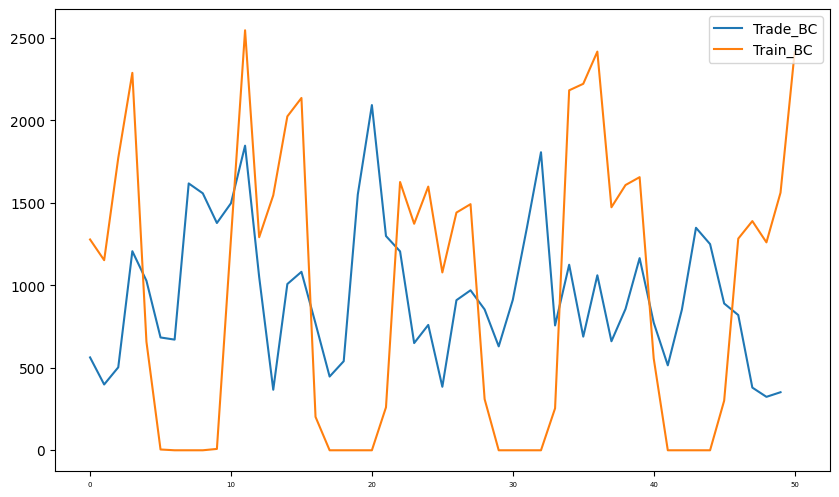

In [6]:
# international_trade.csv의 수입 금액과 train data의 price(원/kg) 의 비교
compare_item = "브로콜리"
compare_item_en = "BC"

item_trade = trade[trade['품목명'].str.contains(compare_item)].groupby(['기간']).sum()


item_train = train[train['item'] == compare_item_en].groupby(['year', 'month'])[['supply(kg)', 'price(원/kg)']].mean().reset_index()
# item_train['price(원/kg)'] = (item_train['price(원/kg)'] - item_train['price(원/kg)'].min()) / (item_train['price(원/kg)'].max() - item_train['price(원/kg)'].min())

plt.figure(figsize=(10, 6))
plt.xticks(fontsize=5)
plt.plot(np.arange(len(item_trade.index)), item_trade['수입 금액'].to_numpy(), label=f'Trade_{compare_item_en}')
plt.plot(np.arange(len(item_train.index)), item_train['price(원/kg)'].to_numpy(), label=f'Train_{compare_item_en}')
plt.legend(loc='upper right')
plt.show()

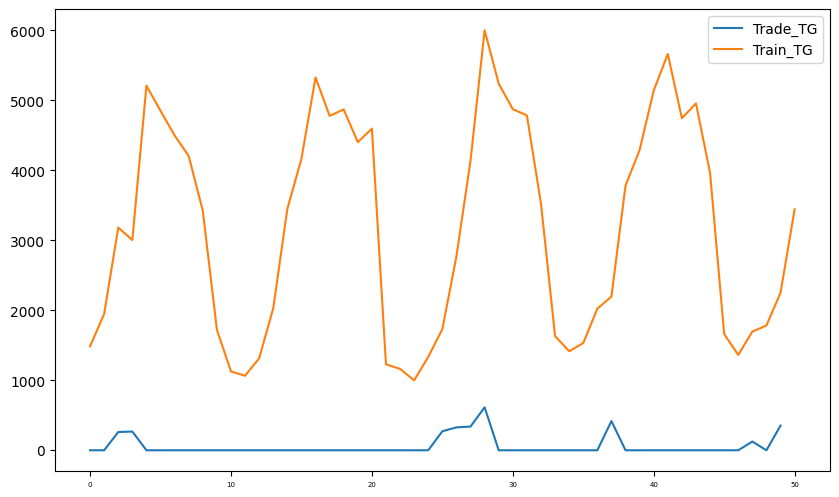

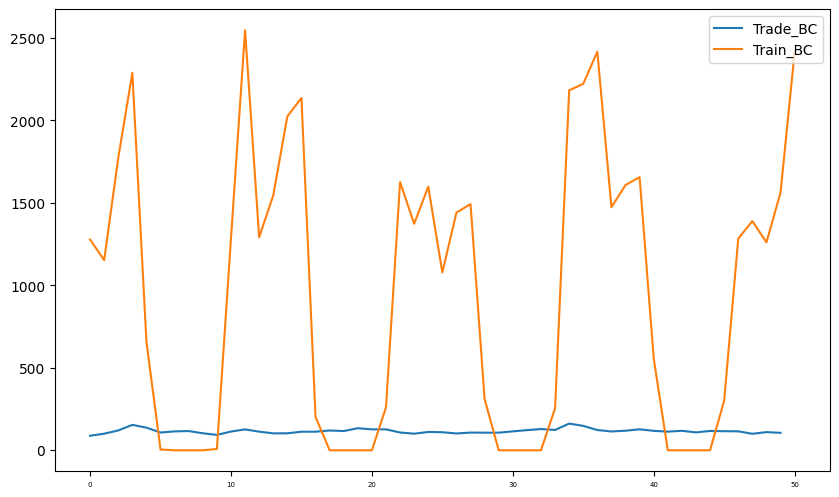

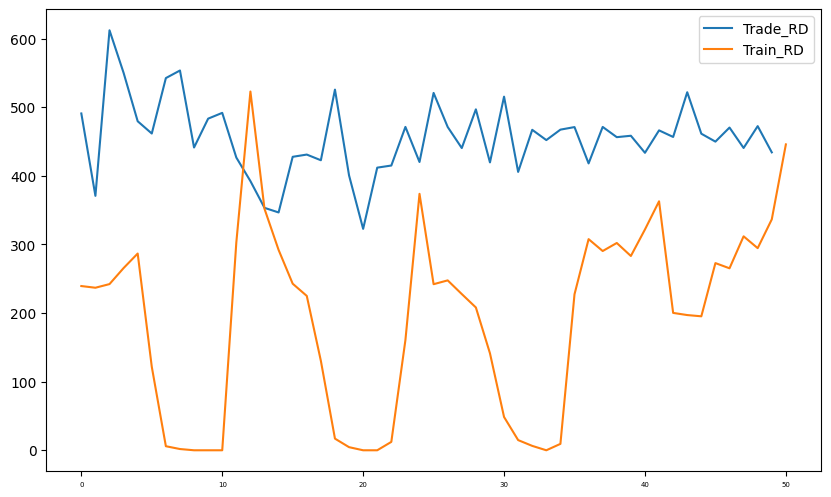

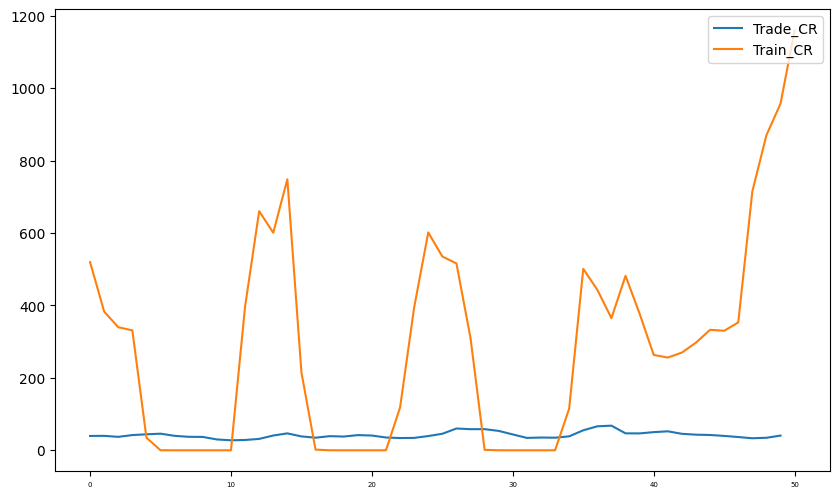

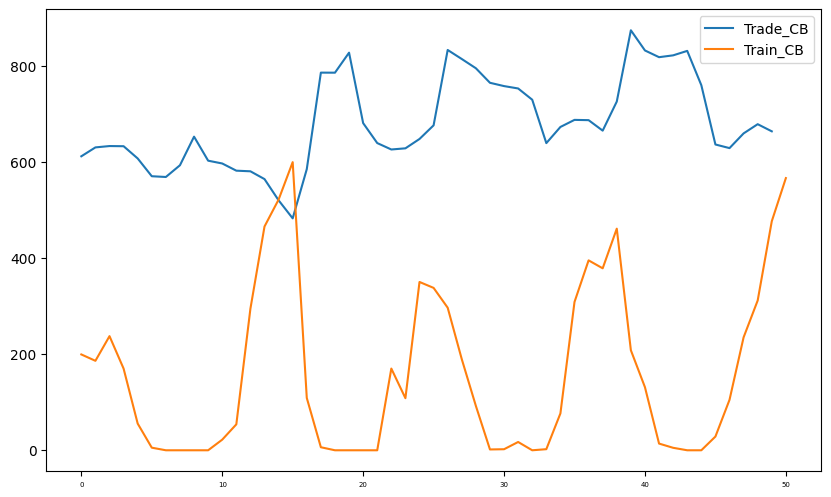

In [30]:
items = [("감귤", "TG"), ("브로콜리", "BC"), ("무", "RD"), ("당근", "CR"), ("양배추", "CB")]
shift_amounts = [0,0,0,0,0]

for i, (compare_item, compare_item_en) in enumerate(items):
    item_trade = trade[trade['품목명'].str.contains(compare_item)].groupby(['기간']).sum()
    # item_trade['수입 금액'] = (item_trade['수입 금액'].values - item_trade['수입 금액'].values.min()) / (item_trade['수입 금액'].values.max() - item_trade['수입 금액'].values.min())

    item_train = train[train['item'] == compare_item_en].groupby(['year', 'month'])[['supply(kg)', 'price(원/kg)']].mean().reset_index()
    # item_train['price(원/kg)'] = (item_train['price(원/kg)'] - item_train['price(원/kg)'].min()) / (item_train['price(원/kg)'].max() - item_train['price(원/kg)'].min())

    plt.figure(figsize=(10, 6))
    plt.xticks(fontsize=5)
    plt.plot(np.arange(len(item_trade.index)) + shift_amounts[i], item_trade['수입가격'].to_numpy(), label=f'Trade_{compare_item_en}')
    plt.plot(np.arange(len(item_train.index)), item_train['price(원/kg)'].to_numpy(), label=f'Train_{compare_item_en}')
    plt.legend(loc='upper right')
    plt.show()